In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
def f(x):
    return np.sin(np.pi * x) / (np.pi * x) + 0.1 * x

def gen_data(n):
    np.random.seed(0)
    x = np.linspace(-3,3,n)
    y = f(x) + 0.2 * np.random.normal(0,1,n)
    ind = np.random.permutation(np.arange(n))
    return x[ind],y[ind]

In [3]:
def MSE(y_hat, y):
    return(np.linalg.norm(y_hat - y, ord = 2) ** 2) / len(y)

In [4]:
def train_test_split(X, Y, n, ind = 0):
    l = len(y)
    start = ind * int(l/n)
    end = (ind + 1) * int(l/n)
    
    test_X = X[start: end]
    train_X = np.delete(X, np.arange(start,end), axis = 0)
    test_Y = Y[start: end]
    train_Y = np.delete(Y, np.arange(start,end))
    
    return train_X, train_Y, test_X, test_Y

In [5]:
def cross_val_score(model, X, y, n):
    score = 0
    for i in range(n):
        train_X, train_y, test_X, test_y = train_test_split(X, y, n, i)
        model.fit(train_X,train_y)
        y_hat = model.predict(test_X)
        score = score + MSE(y_hat, test_y) / n
    return score

In [6]:
class GaussianKernelL2Regression:
    
    def __init__(self, _lambda = 0.1, h = 1):
        self._lambda = _lambda
        self.h = h
    
    def K(self,x1,x2, h):
        return np.exp(-(np.linalg.norm(x1 - x2, ord=2) ** 2)/(2* (h ** 2)))

    def K_matrix(self, x, y, h):
        return np.array([self.K(i,j,h) for i in x for j in y]).reshape(len(x),len(y))

    def fit(self, X, y):
        K = self.K_matrix(X,X,h)
        self.X = X
        self.theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(K, K) + self._lambda * np.eye(len(X))), K),y)
        
    def predict(self, X):
        return np.matmul(self.K_matrix(X, self.X, h), self.theta)

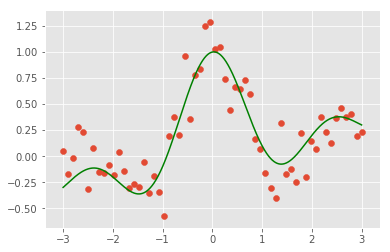

In [7]:
#Data Generation
x, y = gen_data(60)
plt.plot(np.linspace(-3,3, 1000), f(np.linspace(-3,3, 1000)), color = "g")
plt.scatter(x,y)

MSE : 0.0357642838464


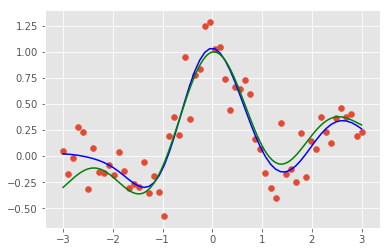

In [8]:
#modeling
h = 0.5
_lambda = 1
model = GaussianKernelL2Regression(_lambda = _lambda, h = h)
model.fit(x[:, np.newaxis],y)
y_hat = model.predict(x[:, np.newaxis])

#sort for plotting
ind = np.argsort(x)
x = x[ind]
y = y[ind]
y_hat = y_hat[ind]

print("MSE :", MSE(y_hat, y))

plt.plot(x, y_hat, color = "b")
plt.plot(np.linspace(-3,3, 1000), f(np.linspace(-3,3, 1000)), color = "g")
plt.scatter(x,y)

In [9]:
x, y = gen_data(80)
ls = [0.01, 0.1, 1, 10, 100]
hs = [0.01, 0.1, 1, 10, 100]
cross_val_num = 5
ans = pd.DataFrame(None, columns = {"lambda", "h", "cross_val_error"})

for l in ls:
    for h in hs:
        model = GaussianKernelL2Regression(_lambda = l, h = h)
        score = cross_val_score(model, x[:,np.newaxis], y, cross_val_num)
        ans = ans.append({"lambda" : l, "h" : h, "cross_val_error" : score}, ignore_index=True)

In [10]:
ans[ans["cross_val_error"] == ans["cross_val_error"].min()]

,lambda,cross_val_error,h
2,0.01,0.040758,1.0
